In [1]:
# Adapted from Mitsuba 3's Official Tutorials:
# https://mitsuba.readthedocs.io/en/latest/src/inverse_rendering/shape_optimization.html
# https://mitsuba.readthedocs.io/en/stable/src/how_to_guides/mesh_io_and_manipulation.html

import drjit as dr
import mitsuba as mi
import matplotlib.pyplot as plt
import os

mi.set_variant('llvm_ad_rgb')


In [2]:
# Dependencies:
# !pip install cholespy
# !pip install gpytoolbox

In [3]:
mi.xml_to_props("banana_updated.xml")

[('Scene',
  Properties[
    plugin_name = "scene",
    id = "_unnamed_0",
    elements = {
      "elm__0" -> "elm__0",
      "elm__1" -> "elm__1",
      "elm__2" -> "elm__2",
      "elm__3" -> "elm__3",
      "elm__4" -> "elm__4",
      "elm__5" -> "elm__5",
      "elm__6" -> "elm__6",
      "elm__7" -> "elm__7",
      "elm__8" -> "elm__8",
      "elm__9" -> "elm__9",
      "elm__10" -> "elm__10",
      "elm__11" -> "elm__11",
      "elm__12" -> "elm__12",
      "elm__13" -> "elm__13",
      "elm__14" -> "elm__14"
    }
  ]),
 ('Sensor',
  Properties[
    plugin_name = "perspective",
    id = "elm__14",
    elements = {
      "far_clip" -> 1000,
      "film" -> "_unnamed_28",
      "fov" -> 64.0221,
      "fov_axis" -> "x",
      "near_clip" -> 0.1,
      "principal_point_offset_x" -> 0,
      "principal_point_offset_y" -> 0,
      "sampler" -> "_unnamed_27",
      "to_world" -> [[-0.924944, -0.259631, -0.277615, 2.17347],
   [-0.274506, -0.0489222, 0.96034, -2.67508],
   [-0.262915, 

In [4]:
from mitsuba import ScalarTransform4f as T

active_indices_plus_1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
active_indices = [index-1 for index in active_indices_plus_1]

to_world_list = [
    T([
        [-0.761487, -0.435817, -0.479794, 2.65777],
        [-0.527851, -0.0126419, 0.849243, -1.83712],
        [-0.37618, 0.899947, -0.22042, -1.39047],
        [0, 0, 0, 1]
    ]), #1
    T([
        [-0.40831, -0.629649, -0.660927, 3.35112],
        [-0.752151, -0.178205, 0.634439, -0.77301],
        [-0.517254, 0.756165, -0.400828, -0.591697],
        [0, 0, 0, 1]
    ]), #2
    T([
        [-0.127372, -0.715529, -0.686873, 3.33895],
        [-0.828705, -0.303747, 0.470092, 0.224612],
        [-0.545, 0.629092, -0.554273, 0.077814],
        [0, 0, 0, 1]
    ]), #3
    T([
        [0.313648, -0.580312, -0.751573, 4.23076],
        [-0.829941, -0.552095, 0.0799364, 1.81866],
        [-0.461328, 0.598689, -0.654788, 0.998348],
        [0, 0, 0, 1]
    ]), #4
    T([
        [0.877061, -0.306184, -0.370156, 2.23515],
        [-0.426908, -0.8501, -0.308349, 3.73857],
        [-0.220258, 0.428463, -0.876302, 2.02305],
        [0, 0, 0, 1]
    ]), #5
    T([
        [0.999562, -0.0260534, 0.0140109, 0.290532],
        [-0.0194337, -0.935423, -0.352996, 3.80493],
        [0.0223028, 0.352569, -0.93552, 2.18121],
        [0, 0, 0, 1]
    ]), #6
    T([
        [0.919741, 0.21946, 0.325444, -1.14708],
        [0.320661, -0.898268, -0.300486, 3.33745],
        [0.226391, 0.380727, -0.896546, 1.81134],
        [0, 0, 0, 1]
    ]), #7
    T([
        [0.7136, 0.377279, 0.590284, -2.54665],
        [0.570557, -0.801911, -0.177211, 2.72416],
        [0.406497, 0.463248, -0.787503, 1.21879],
        [0, 0, 0, 1]
    ]), #8
    T([
        [0.242004, 0.527287, 0.814495, -3.51505],
        [0.809586, -0.572419, 0.130027, 1.18537],
        [0.534794, 0.627937, -0.565412, 0.264129],
        [0, 0, 0, 1]
    ]), #9
    T([
        [-0.0538278, 0.529011, 0.846906, -3.42387],
        [0.823223, -0.456519, 0.337483, 0.133935],
        [0.56516, 0.715358, -0.410921, -0.598096],
        [0, 0, 0, 1]
    ]), #10
    # somehow there's a flip going on for #11 and #12 sensors
    T([
        [-0.538345, 0.435982, 0.721182, -2.87239],
        [0.699711, -0.245695, 0.670849, -1.53885],
        [0.469669, 0.865768, -0.172793, -1.58024],
        [0, 0, 0, 1]
    ]), #12
    T([
        [-0.886821, 0.229873, 0.400883, -1.07143],
        [0.397902, -0.0612994, 0.915378, -2.60014],
        [0.234995, 0.971288, -0.0371054, -2.38561],
        [0, 0, 0, 1]
    ]), #11
    T([
        [-0.994695, -0.00129575, 0.102857, 0.36554],
        [0.10286, -0.00344105, 0.99469, -2.86139],
        [-0.000934934, 0.999993, 0.00355608, -2.3446],
        [0, 0, 0, 1]
    ]), #13
    T([
        [-0.924944, -0.259631, -0.277615, 2.17347],
        [-0.274506, -0.0489222, 0.96034, -2.67508],
        [-0.262915, 0.964468, -0.0260199, -2.23297],
        [0, 0, 0, 1]
    ])  #14
]

sensor_count = len(active_indices)
sensors = []

for i in active_indices:
    sensors.append(mi.load_dict({
        'type': 'perspective',
        'fov_axis' : 'x',
        'fov': 64.022150,
        'to_world': to_world_list[i],
        'film': {
            'type': 'hdrfilm',
            'width': 600, 'height': 400,
            'filter': {'type': 'gaussian'},
            'sample_border': True
        },
        'sampler': {
            'type': 'independent',
            'sample_count': 128
        }
    }))


In [5]:
# If exporting PLY from Blender:
# Format        : Check "ASCII" (for later edits)
# Limit to      : Check "Selected Only"
# Scale         : 1.000
# Forward Axis  : -Z
# Up Axis       : Y
# Objects       : Check Apply Modifiers (if needed)
# Geometry      : Dont Check "UV Coordinates" (not needed)
#                 Don't Check "Vertex Normals" (let Mitsuba calculate)
# Vertex Colors : Select "Linear"
#                 Check "Triangulated Mesh"
# Then, manually edit the PLY file:
# 1. In the header:
#   change "uchar color" to "float color" where "color" is "red"/"green"/"blue"
#   remove the line "property uchar alpha"
# 2. After the header:
#   replace all (0-255, 0-255, 0-255, 0-255) rbga values with (0-1, 0-1, 0-1) rgb values
# 3. When loading the PLY file in Mitsuba:
#   need 'flip_normals' : True

mesh = mi.load_dict({
    "type": "ply",
    'filename': "./meshes/banana_view11.ply",
    # 'flip_normals' : True,
    "bsdf": {
        "type": "diffuse",
        'reflectance': {
            'type': 'mesh_attribute',
            'name': 'vertex_color'
        }
        # 'reflectance': {
        #     'type': 'rgb',
        #     'value': [0.2, 0.2, 0.2]
        # }
    }
})

attribute_size = mesh.vertex_count() * 3
mesh.add_attribute(
    "vertex_color", 3, [0.20] * attribute_size
)

mesh_params = mi.traverse(mesh)
print(mesh_params)
# mesh_params['vertex_normals'] *= -1
# mesh_params.update()

scene_dict = {
    'type': 'scene',
    'integrator': {
        'type': 'direct_projective',
        'sppi': 0, 
    },
    'emitter': {
        'type': 'constant',
        'radiance': 1.0,
    },
    'shape': mesh
}

scene = mi.load_dict(scene_dict)
params = mi.traverse(scene)
print(params)
print(list(params["shape.vertex_color"])[:9])
print(list(params["shape.vertex_normals"])[:9])


SceneParameters[
  ---------------------------------------------------------------------------------
  Name                          Flags    Type  Parent
  ---------------------------------------------------------------------------------
  bsdf.reflectance.scale                 float MeshAttribute
  silhouette_sampling_weight             float PLYMesh
  faces                                  UInt  PLYMesh
  vertex_positions              ∂, D     Float PLYMesh
  vertex_normals                ∂, D     Float PLYMesh
  vertex_texcoords              ∂        Float PLYMesh
  vertex_color                  ∂        Float PLYMesh
]
SceneParameters[
  ---------------------------------------------------------------------------------------
  Name                                Flags    Type  Parent
  ---------------------------------------------------------------------------------------
  emitter.sampling_weight                      float ConstantBackgroundEmitter
  emitter.radiance.value        

In [6]:
def plot_images(images):
    images_count = len(images)
    fig, axs = plt.subplots(1, images_count, figsize=(images_count*5, 5))
    if images_count == 1:
        axs.imshow(mi.util.convert_to_bitmap(images[i]))
        axs.axis('off')
    else:
        for i in range(images_count):
            axs[i].imshow(mi.util.convert_to_bitmap(images[i]))
            axs[i].axis('off')

def plot_images_each(images):
    for image in images:
        plt.imshow(mi.util.convert_to_bitmap(image))
        plt.axis("off")
        plt.show()


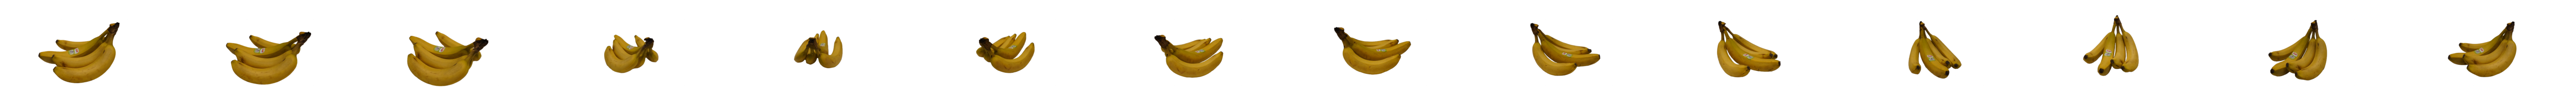

In [7]:
ref_images = []
for i in active_indices_plus_1:
    ref_image = mi.Bitmap(f"./refs/banana/banana{i}_600x400.png")
    ref_image = ref_image.convert(
        pixel_format=mi.Bitmap.PixelFormat.RGB,
        component_format=mi.Struct.Type.Float32,
        srgb_gamma=False,
    )
    ref_images.append(ref_image)

plot_images(ref_images)
# plot_images_each(ref_images)


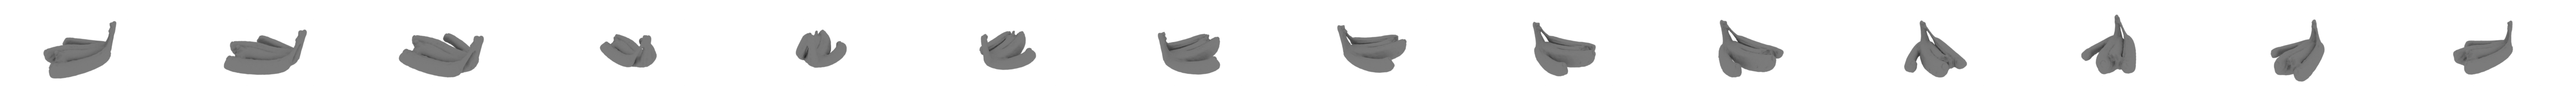

In [8]:
init_images = [mi.render(scene, sensor=sensors[i], spp=128) for i in range(sensor_count)]
plot_images(init_images)


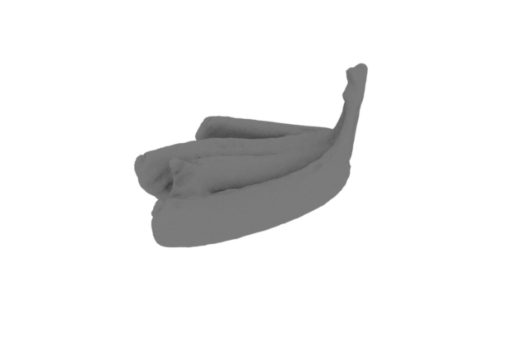

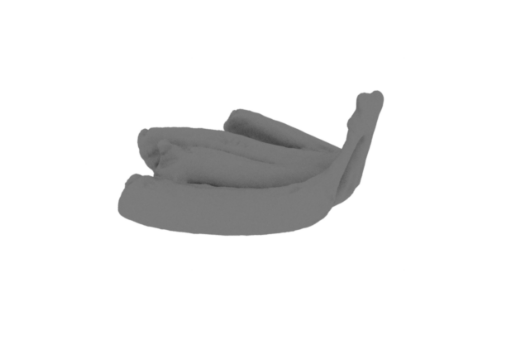

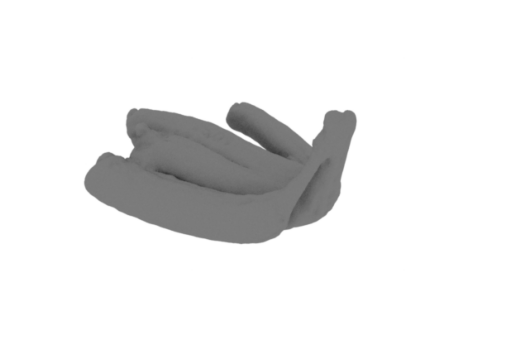

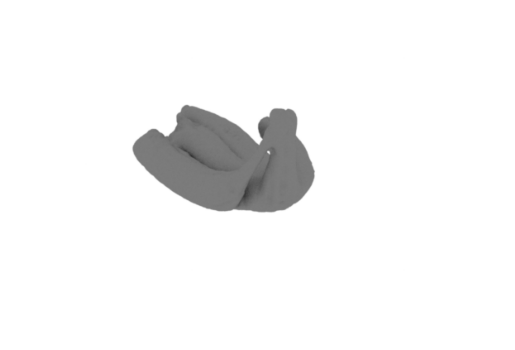

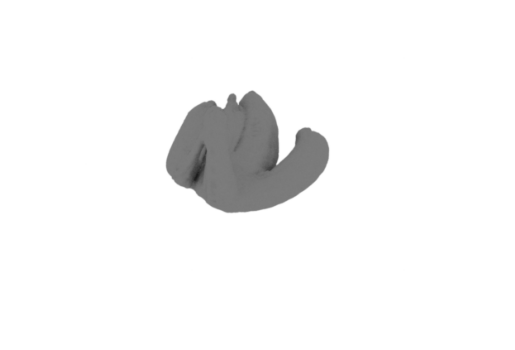

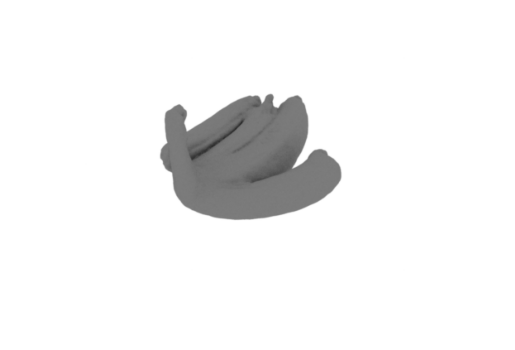

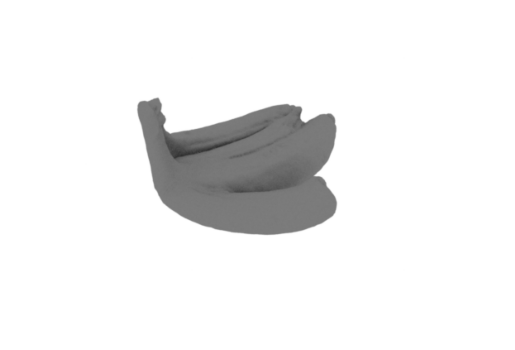

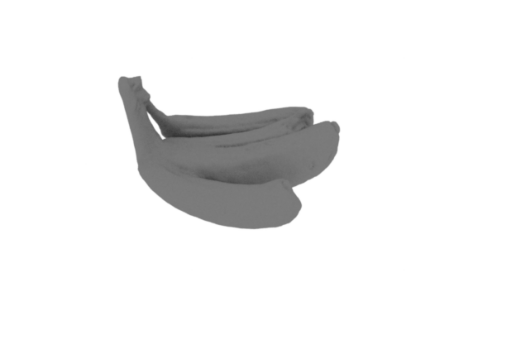

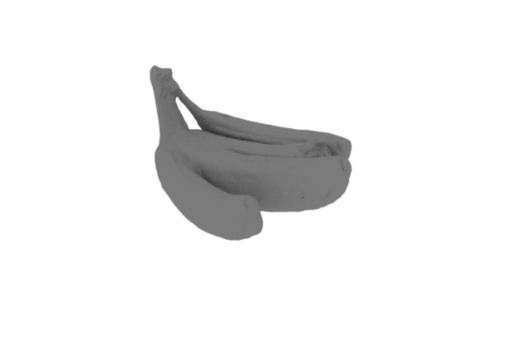

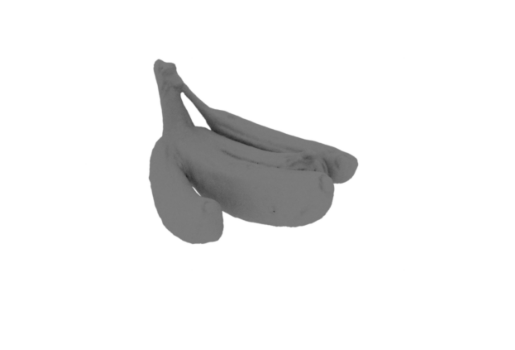

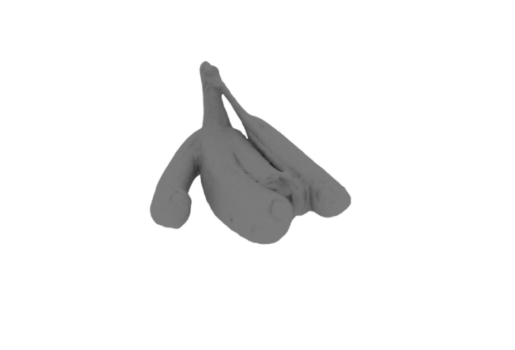

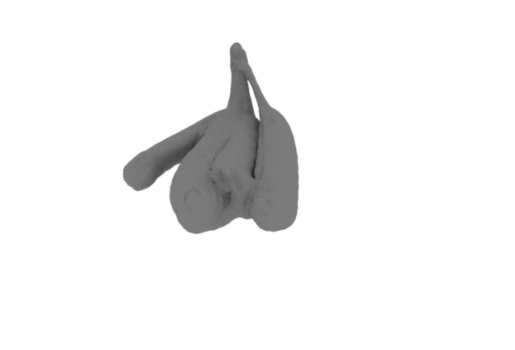

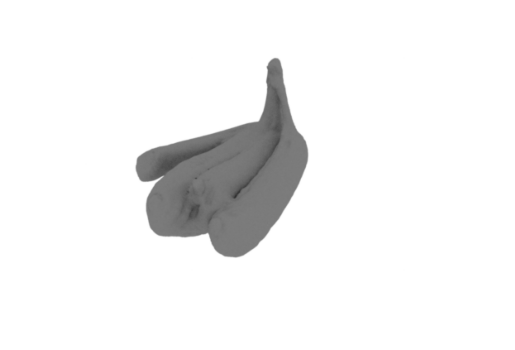

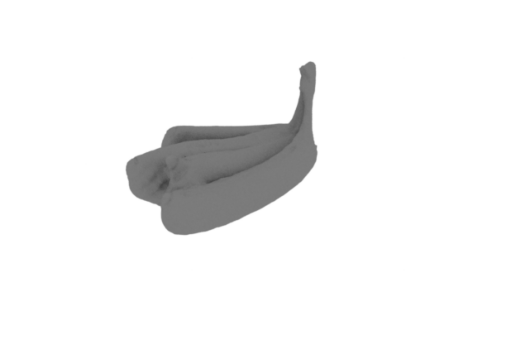

In [9]:
plot_images_each(init_images)

In [10]:
lambda_ = 25
ls = mi.ad.LargeSteps(params['shape.vertex_positions'], params['shape.faces'], lambda_)

In [11]:
lr = 1e-2
opt = mi.ad.Adam(lr=lr, uniform=True)

In [12]:
opt['shape.vertex_positions'] = ls.to_differential(params['shape.vertex_positions'])
opt['shape.vertex_color'] = params['shape.vertex_color']

In [13]:
iterations = 100
loss_vec = []
for it in range(iterations):
    total_loss = mi.Float(0.0)

    for sensor_idx in range(sensor_count):
        params['shape.vertex_positions'] = ls.from_differential(opt['shape.vertex_positions'])
        params['shape.vertex_color'] = opt['shape.vertex_color']
        params.update()

        img = mi.render(scene, params, sensor=sensors[sensor_idx], seed=it)

        # L1 Loss
        loss = dr.mean(dr.abs(img - ref_images[sensor_idx]))

        dr.backward(loss)
        opt.step()
        params.update(opt)

        total_loss += loss

    loss_vec.append(total_loss)
    print(f"Iter: {1+it:03d}; Loss: {total_loss[0]}")

Iter: 001; Loss: 0.611119
Iter: 002; Loss: 0.577477
Iter: 003; Loss: 0.543009
Iter: 004; Loss: 0.508335
Iter: 005; Loss: 0.473731
Iter: 006; Loss: 0.442087
Iter: 007; Loss: 0.413468
Iter: 008; Loss: 0.386935
Iter: 009; Loss: 0.362037
Iter: 010; Loss: 0.338055
Iter: 011; Loss: 0.314463
Iter: 012; Loss: 0.291414
Iter: 013; Loss: 0.269127
Iter: 014; Loss: 0.248866
Iter: 015; Loss: 0.229439
Iter: 016; Loss: 0.210769
Iter: 017; Loss: 0.193574
Iter: 018; Loss: 0.17884
Iter: 019; Loss: 0.166021
Iter: 020; Loss: 0.154593
Iter: 021; Loss: 0.144716
Iter: 022; Loss: 0.136696
Iter: 023; Loss: 0.130466
Iter: 024; Loss: 0.124707
Iter: 025; Loss: 0.11958
Iter: 026; Loss: 0.115275
Iter: 027; Loss: 0.111318
Iter: 028; Loss: 0.107629
Iter: 029; Loss: 0.104922
Iter: 030; Loss: 0.102038
Iter: 031; Loss: 0.100551
Iter: 032; Loss: 0.0984377
Iter: 033; Loss: 0.0979542
Iter: 034; Loss: 0.0957333
Iter: 035; Loss: 0.0948145
Iter: 036; Loss: 0.0936824
Iter: 037; Loss: 0.0935533
Iter: 038; Loss: 0.0926815
Iter: 0

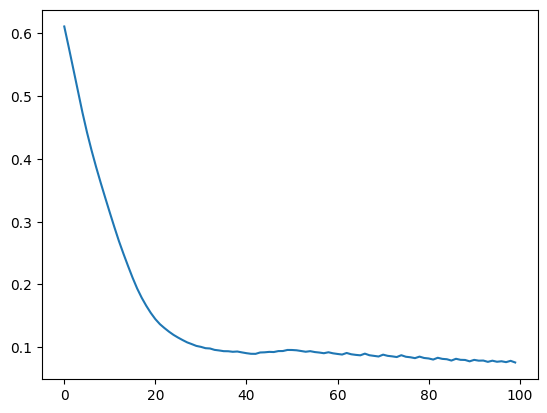

In [14]:
plt.plot(loss_vec) # somehow doesn't work if loss_vec.append(total_loss[0])
plt.show()


In [15]:
params['shape.vertex_positions'] = ls.from_differential(opt['shape.vertex_positions'])
params['shape.vertex_color'] = opt['shape.vertex_color']
params.update()

print(list(params["shape.vertex_normals"])[:9])


[-0.5958459973335266, 0.8016251921653748, -0.048628341406583786, -0.25088727474212646, 0.9653522372245789, -0.07176830619573593, -0.7813208699226379, 0.2642836272716522, -0.5654129981994629]


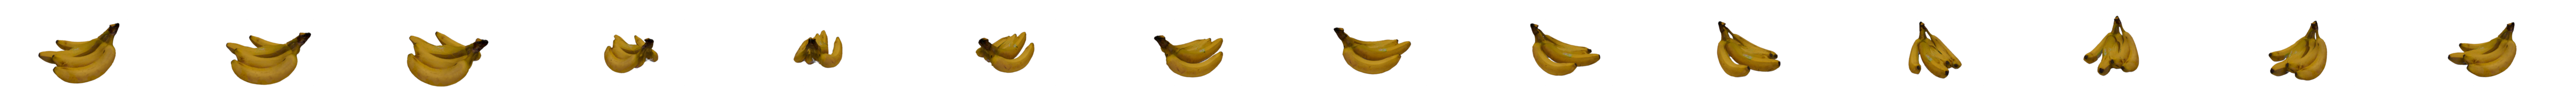

In [16]:
final_images = [mi.render(scene, sensor=sensors[i], spp=128) for i in range(sensor_count)]
plot_images(final_images)


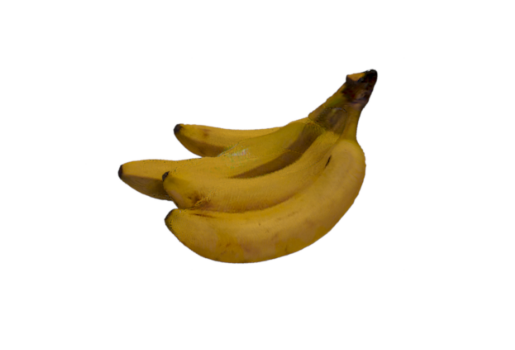

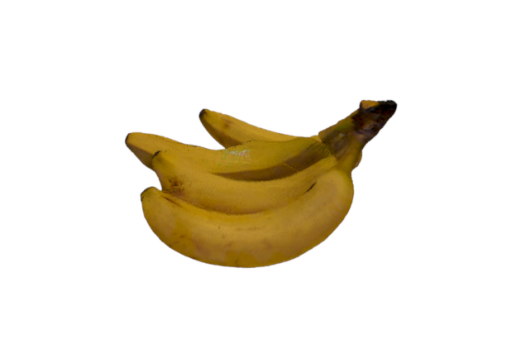

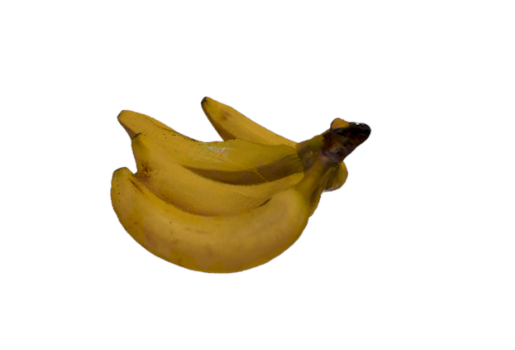

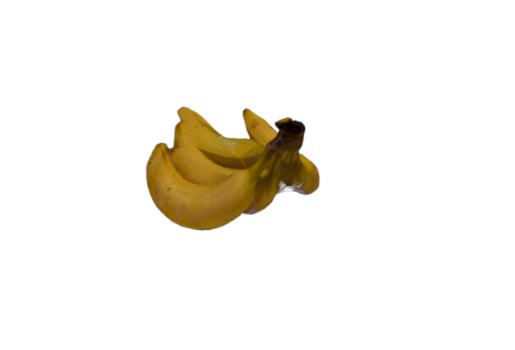

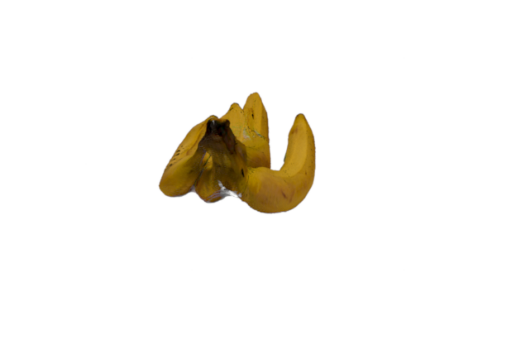

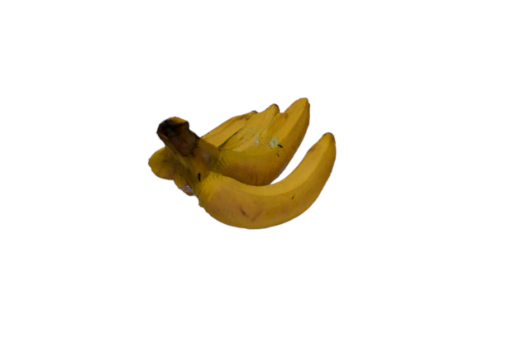

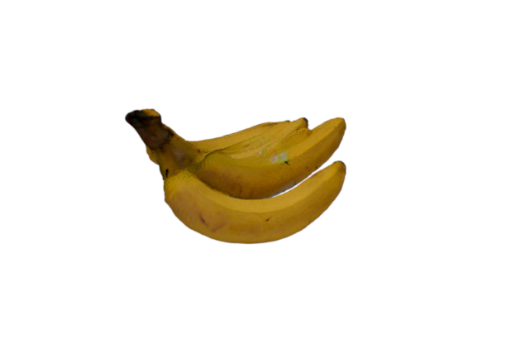

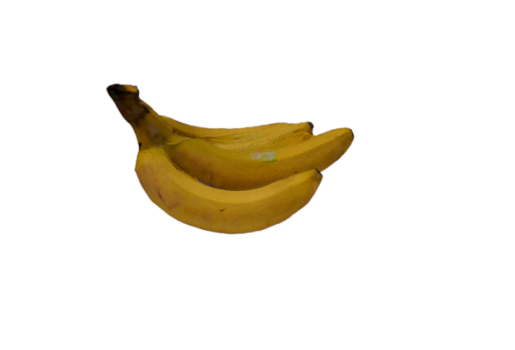

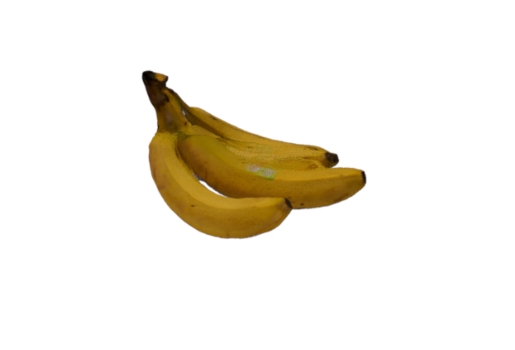

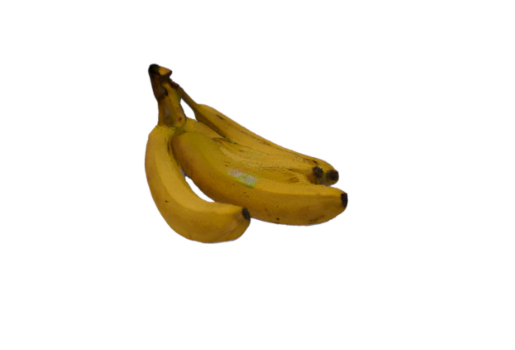

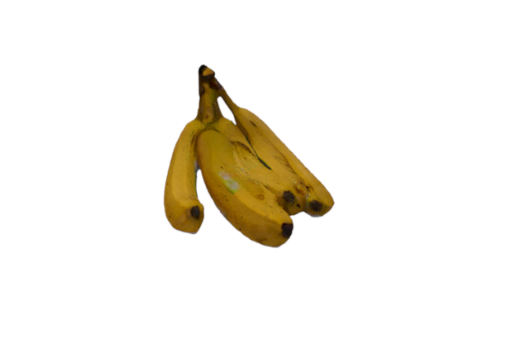

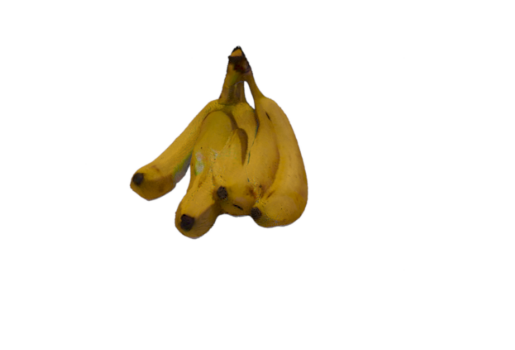

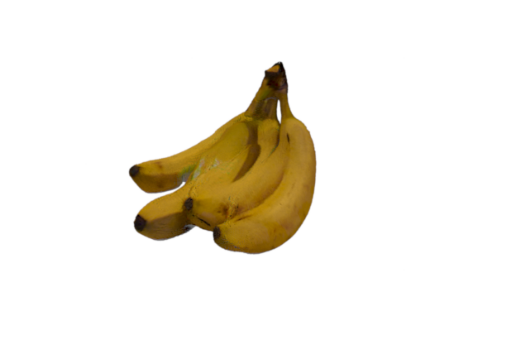

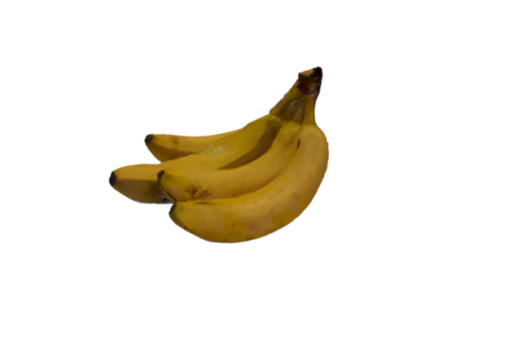

In [17]:
plot_images_each(final_images)


In [18]:
mesh.write_ply(f"./outputs/banana_view11/banana_optimized_{str(sensor_count)}views_lr{str(lr)}_it{str(iterations)}.ply")
